# Task 1 Asteroids Classification

Import required libraries and load the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

asteroid_set1 = pd.read_csv("China Aug 2022 Asteroid 1.csv")

## 1.1 Review the data-set

In [2]:
asteroid_set1

,ID,Alamosite,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Semseyite,Creedite,Xieite,Eveite,Rutile,Tyrolite,Feroxyhyte,Kostovite
0,Ast_000001,1893,3812,4945,4139,2689,3768,9569,3164,4259,2396,4239,12622,2955,5695,3161,3115,3356,3309
1,Ast_000002,3604,4652,2587,2021,4569,1844,16390,1598,3981,5562,2426,6278,4205,3471,1100,2433,3845,1607
2,Ast_000003,4370,4676,2648,2375,4468,1037,19471,1495,3981,5267,1924,7317,3366,2485,1598,2313,3802,1905
3,Ast_000004,2767,5068,1547,2958,3945,2363,13061,4045,3327,3581,2042,9063,5112,2422,4076,4758,4329,2643
4,Ast_000005,2007,4186,3776,3177,3575,2242,10044,3059,4721,2719,4707,9740,4266,3564,1595,2919,1938,4296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,Ast_004962,3667,1609,1474,4249,1874,3550,16676,1869,3931,2624,3212,12939,2803,4728,2622,3101,2925,3822
4962,Ast_004963,3096,4581,1941,3104,3761,2718,14390,4000,3168,3973,1981,9505,4369,2606,3889,4222,4742,2829
4963,Ast_004964,4136,1868,1499,4403,2121,3932,18554,1777,3973,2627,2774,13394,2295,4994,2146,2888,2853,3623
4964,Ast_004965,4543,1783,1996,3374,4591,3792,20177,3744,3080,4944,3562,10320,3955,2812,1942,2380,4529,2951


Check out missing data

In [3]:
asteroid_set1.isnull().sum().sum()

85

In [4]:
asteroid_set1.isnull().sum()

ID                 0
Alamosite          5
Chalcophyllite     6
Gypsum             2
Orpiment           6
Junitoite          5
Phoenicochroite    7
Groutite           1
Zykaite            7
Weloganite         2
Diadochite         4
Semseyite          5
Creedite           4
Xieite             7
Eveite             5
Rutile             2
Tyrolite           6
Feroxyhyte         6
Kostovite          5
dtype: int64

Remove the ID column from the data-set, which is not helpful for subsequent modeling and analysis.

In [5]:
asteroid_set1.drop('ID', axis=1, inplace=True)

In [6]:
asteroid_set1.dtypes # means there are outlier data that are not numbers in the data

Alamosite          object
Chalcophyllite     object
Gypsum             object
Orpiment           object
Junitoite          object
Phoenicochroite    object
Groutite           object
Zykaite            object
Weloganite         object
Diadochite         object
Semseyite          object
Creedite           object
Xieite             object
Eveite             object
Rutile             object
Tyrolite           object
Feroxyhyte         object
Kostovite          object
dtype: object

## 1.1 Data cleaning
### 1.1.1 Handling exception data in data set -- string

In [7]:
data_columns = list(asteroid_set1.columns)
data_columns

['Alamosite',
 'Chalcophyllite',
 'Gypsum',
 'Orpiment',
 'Junitoite',
 'Phoenicochroite',
 'Groutite',
 'Zykaite',
 'Weloganite',
 'Diadochite',
 'Semseyite',
 'Creedite',
 'Xieite',
 'Eveite',
 'Rutile',
 'Tyrolite',
 'Feroxyhyte',
 'Kostovite']

Forced conversion of feature data to numeric types, in case of unconvertible data (string with letters) the data will be converted to NaN.

In [8]:
for i in range(18):
    asteroid_set1[data_columns[i]] = pd.to_numeric(asteroid_set1[data_columns[i]], errors='coerce')

In [9]:
asteroid_set1.dtypes

Alamosite          float64
Chalcophyllite     float64
Gypsum             float64
Orpiment           float64
Junitoite          float64
Phoenicochroite    float64
Groutite           float64
Zykaite            float64
Weloganite         float64
Diadochite         float64
Semseyite          float64
Creedite           float64
Xieite             float64
Eveite             float64
Rutile             float64
Tyrolite           float64
Feroxyhyte         float64
Kostovite          float64
dtype: object

In [10]:
asteroid_set1[0:5]

,Alamosite,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Semseyite,Creedite,Xieite,Eveite,Rutile,Tyrolite,Feroxyhyte,Kostovite
0,1893.0,3812.0,4945.0,4139.0,2689.0,3768.0,9569.0,3164.0,4259.0,2396.0,4239.0,12622.0,2955.0,5695.0,3161.0,3115.0,3356.0,3309.0
1,3604.0,4652.0,2587.0,2021.0,4569.0,1844.0,16390.0,1598.0,3981.0,5562.0,2426.0,6278.0,4205.0,3471.0,1100.0,2433.0,3845.0,1607.0
2,4370.0,4676.0,2648.0,2375.0,4468.0,1037.0,19471.0,1495.0,3981.0,5267.0,1924.0,7317.0,3366.0,2485.0,1598.0,2313.0,3802.0,1905.0
3,2767.0,5068.0,1547.0,2958.0,3945.0,2363.0,13061.0,4045.0,3327.0,3581.0,2042.0,9063.0,5112.0,2422.0,4076.0,4758.0,4329.0,2643.0
4,2007.0,4186.0,3776.0,3177.0,3575.0,2242.0,10044.0,3059.0,4721.0,2719.0,4707.0,9740.0,4266.0,3564.0,1595.0,2919.0,1938.0,4296.0


### 1.1.2 Handling exception data in data set -- Outlier data

The construction of box plot is based on the inter-quartile range (IQR) in statistics. The statistical dispersion is measured by dividing the data set into quartiles. The box plot provides a standard for identifying outliers.

Use the box plot to view outlier value in the data:

<AxesSubplot:>

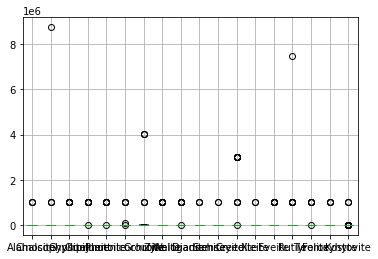

In [11]:
asteroid_set1.boxplot()

We can see that the circles represent the outliers.

Next, a function 'detect_outliers' is defined to detect the outliers from the box plot, returning the outliers in the dataset and their corresponding indexes.

In [12]:
def detect_outliers(Datalist):
    q1 = Datalist.quantile(0.25)
    q3 = Datalist.quantile(0.75)
    iqr = q3-q1               # Interquartile range
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    
    # detect the outliers and indexes
    outliers = Datalist.loc[(Datalist < fence_low) | (Datalist > fence_high)]
    return outliers
    

In [13]:
detect_outliers(asteroid_set1['Chalcophyllite'])

1374    1000222.182
1539    1000275.838
3933    1000280.565
4375    8745635.000
Name: Chalcophyllite, dtype: float64

Iterate through the dataset, replacing all outliers found with NaN:

In [14]:
data_columns = list(asteroid_set1.columns)

for i in range(18):
    result = detect_outliers(asteroid_set1[data_columns[i]])
    result = dict(result)
    for key in result:
        asteroid_set1.loc[key, data_columns[i]] = float('NaN')
        

<AxesSubplot:>

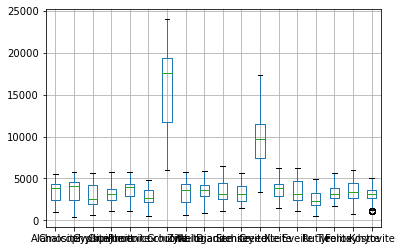

In [15]:
asteroid_set1.boxplot()

After the above steps, only the NaN value remains for the exception data.

### 1.1.3 Visualise missing data

<AxesSubplot:>

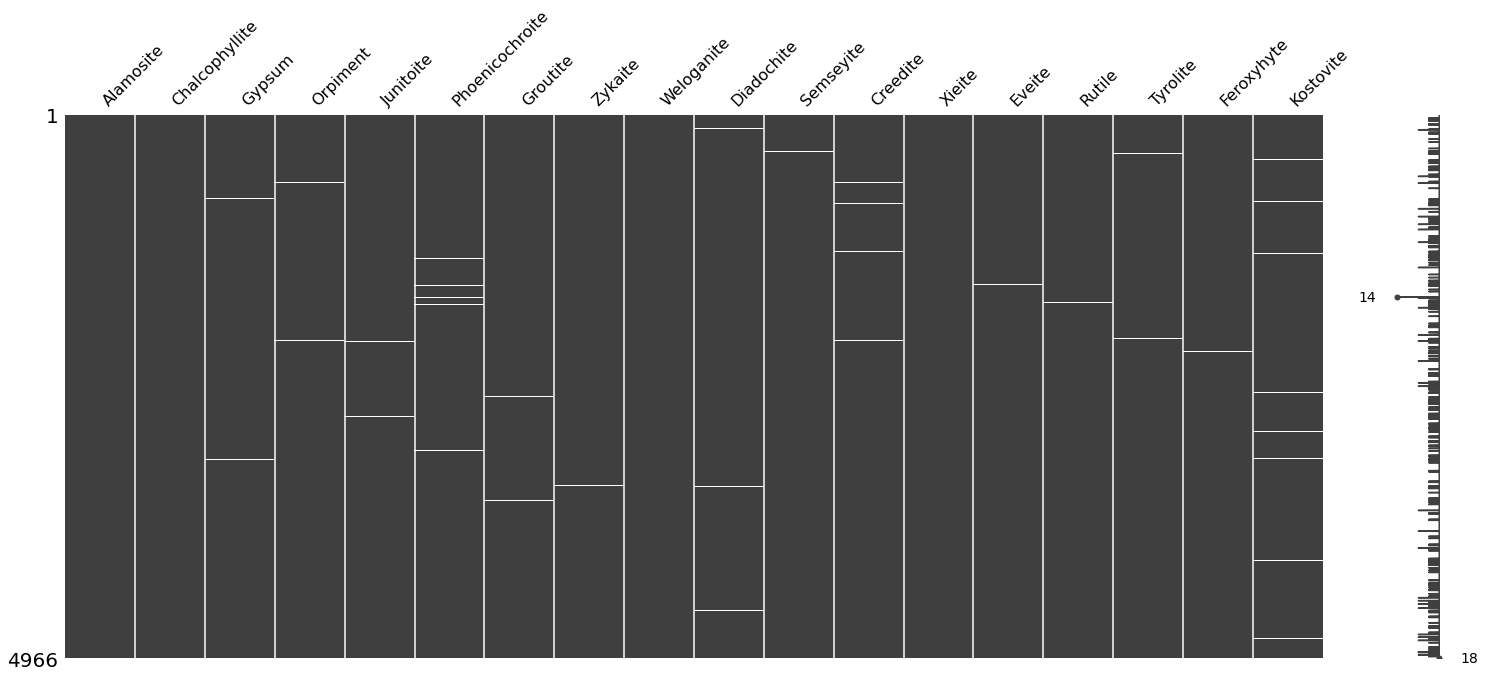

In [16]:
import missingno as msno
msno.matrix(asteroid_set1)

### 1.1.4 Handling exception data in data set --NaN value

In [17]:
asteroid_set1.shape

(4966, 18)

In [18]:
asteroid_set1.isnull().sum().sum()

326

In [19]:
asteroid_set1.isnull().sum()

Alamosite          10
Chalcophyllite     15
Gypsum             12
Orpiment           19
Junitoite          17
Phoenicochroite    18
Groutite           20
Zykaite            18
Weloganite         10
Diadochite         11
Semseyite          10
Creedite           33
Xieite             11
Eveite             13
Rutile             12
Tyrolite           14
Feroxyhyte         15
Kostovite          68
dtype: int64

Removing features that have insufficient data

In [20]:
# drop all the rows with less than 16 data available
limitPer = 16
asteroid_set1.dropna(axis='rows', thresh=limitPer, inplace=True)
asteroid_set1.shape

(4965, 18)

We therefore learn that only 1 set of asteroid data is missing three or more features at the same time. With this in mind, I chose to fix all the remaining missing data by subsituting in the average of the feature (column).

In [21]:
# fix all the columns in the dataframe
data_columns = list(asteroid_set1.columns)

for i in range(18):
    asteroid_set1[data_columns[i]].fillna(asteroid_set1[data_columns[i]].mean(),inplace=True)


In [22]:
asteroid_set1.isnull().sum().sum()

0

In [23]:
asteroid_set1[0:5]

,Alamosite,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Semseyite,Creedite,Xieite,Eveite,Rutile,Tyrolite,Feroxyhyte,Kostovite
0,1893.0,3812.0,4945.0,4139.0,2689.0,3768.0,9569.0,3164.0,4259.0,2396.0,4239.0,12622.0,2955.0,5695.0,3161.0,3115.0,3356.0,3309.0
1,3604.0,4652.0,2587.0,2021.0,4569.0,1844.0,16390.0,1598.0,3981.0,5562.0,2426.0,6278.0,4205.0,3471.0,1100.0,2433.0,3845.0,1607.0
2,4370.0,4676.0,2648.0,2375.0,4468.0,1037.0,19471.0,1495.0,3981.0,5267.0,1924.0,7317.0,3366.0,2485.0,1598.0,2313.0,3802.0,1905.0
3,2767.0,5068.0,1547.0,2958.0,3945.0,2363.0,13061.0,4045.0,3327.0,3581.0,2042.0,9063.0,5112.0,2422.0,4076.0,4758.0,4329.0,2643.0
4,2007.0,4186.0,3776.0,3177.0,3575.0,2242.0,10044.0,3059.0,4721.0,2719.0,4707.0,9740.0,4266.0,3564.0,1595.0,2919.0,1938.0,4296.0


In [24]:
asteroid_set1.describe().round(2)

,Alamosite,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Semseyite,Creedite,Xieite,Eveite,Rutile,Tyrolite,Feroxyhyte,Kostovite
count,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00,4965.00
mean,3469.88,3643.21,2985.56,3150.00,3675.09,2800.13,15881.25,3297.39,3491.38,3482.23,3231.44,9647.57,3724.80,3510.87,2562.98,3286.39,3513.44,3090.55
std,1044.46,1208.55,1246.69,890.84,1016.45,861.91,4175.05,1138.43,1062.47,1119.95,938.68,2669.12,858.31,1200.90,921.50,764.32,1086.65,747.30
min,1002.00,413.00,626.00,1072.00,1072.00,572.00,6005.00,635.00,854.00,1094.00,1454.00,3417.00,1520.00,1085.00,573.00,1762.00,760.00,1144.00
25%,2450.00,2412.00,1897.00,2433.00,2945.00,2161.00,11806.00,2177.00,2855.00,2564.00,2356.00,7504.00,2948.00,2479.00,1835.00,2714.00,2704.00,2676.00
50%,3877.00,4056.00,2550.00,3161.00,3963.00,2691.00,17507.00,3662.00,3631.00,3136.00,3138.00,9666.00,3894.00,3102.00,2361.00,3109.00,3440.00,3096.00
75%,4341.00,4600.00,4180.00,3773.00,4380.00,3572.00,19362.00,4314.00,4265.00,4481.00,4126.00,11516.00,4394.00,4708.00,3235.00,3900.00,4487.00,3653.00
max,5497.00,5762.00,5630.00,5723.00,5787.00,4867.00,23998.00,5713.00,5933.00,6508.00,5604.00,17367.00,6245.00,6268.00,4902.00,5626.00,6063.00,5105.00


## 1.2 Clustering asteroid data

In this task, I use un-supervised Machine Learning algorithm - "k-means".

### 1.2.1 Visualise the data as a chart to help understand it better

I would like to observe the relationships between features in preparation for subsequent clustering:

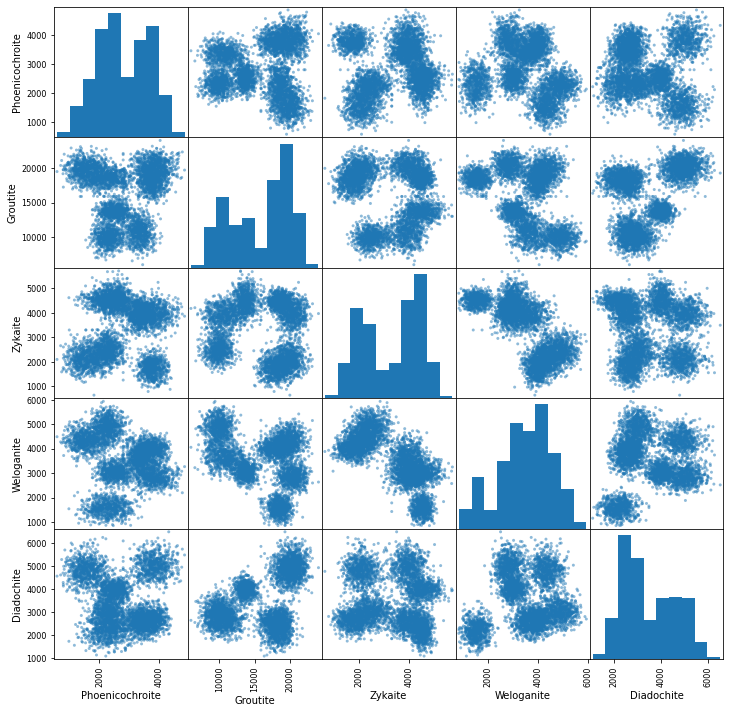

In [25]:
from pandas.plotting import scatter_matrix
asteroid_fewer_columns = asteroid_set1.iloc[:,5:10:1]
scatter_matrix(asteroid_fewer_columns, figsize=(12,12));

Really helpful! As we can see from the diagram, the data can be divided into at least five clusters.

### 1.2.2 Scale the data into a standard size

The data is shifted so that the mean is around zero. At this point the data is scaled to a width that matches the normal Gaussian distribution, providing the basis for subsequent modelling.

In [26]:
standardized_asteroid_set1 = preprocessing.scale(asteroid_set1)
standardized_asteroid_set1_df = pd.DataFrame(standardized_asteroid_set1, 
                                             columns=asteroid_set1.columns)

### 1.2.3 Decide the number of clusters

Measure standard 1：Silhouette Method

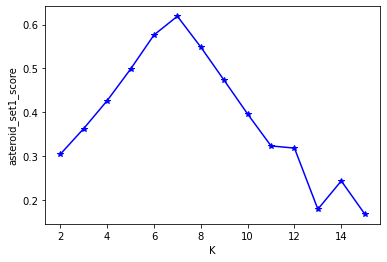

In [27]:
from sklearn import metrics

def k_silhouette(X, clusters):
    K = range(2, clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k) # k is the number of clusters
        kmeans.fit(X)             
        labels = kmeans.labels_   
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))  
                        # metric='euclidean' indicates that the standard of measurement is the Euclidean distance   
    plt.plot(K, S, 'b*-')
    plt.xlabel('K')
    plt.ylabel('asteroid_set1_score')
    
    plt.show();
    
k_silhouette(standardized_asteroid_set1_df, 15)

Measure standard 2：Elbow Method

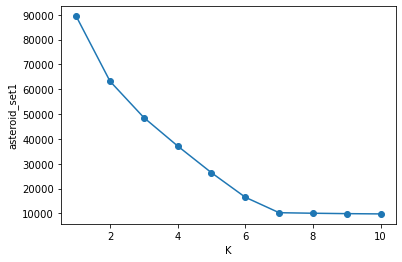

In [28]:
ast = []
for k in range(1,11):        # Indicates the number of clusters per fit
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(standardized_asteroid_set1_df)
    ast.append(kmeans.inertia_)

x = range(1,11)
plt.xlabel('K')
plt.ylabel('asteroid_set1')
plt.plot(x, ast, 'o-')
plt.show()

'silhouette' score and 'elbow' value indicates the optimal number of clusters.

In this task, we can see a good correspondence between the silhouette method and the elbow method, i.e. the optimum number of clusters is 7.

### 1.2.4 Cluster the data (Build the model)

Having completed the above preparatory work, I will use the sklean kmeans algorithm to cluster the asteroid data into seven clusters.

It is worth mentioning that I found that the standardised data worked better in determining the number of clusters (i.e. the two figures above), giving a clearer indication of the optimal number of clusters. However, the raw data performed better in modelling and fitting the data as described below.

In [29]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(asteroid_set1)
y_km = kmeans.fit_predict(asteroid_set1)
# y_km is the set of cluster numbers for each member

### 1.2.5 Review the results

Print the cluster number of some members in the dataset:

In [30]:
print(y_km[0:25])

[6 5 5 4 1 6 3 5 2 2 6 1 5 2 3 4 5 5 6 2 1 6 0 6 1]


Show members of a specific cluster:

In [31]:
print(asteroid_set1[y_km==1][0:5])

    Alamosite  Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  \
4      2007.0          4186.0  3776.0    3177.0     3575.0           2242.0   
11     2423.0          3974.0  3537.0    3914.0     3160.0           2404.0   
20     2146.0          3875.0  3398.0    3886.0     4053.0           1870.0   
24     1310.0          4581.0  4163.0    3845.0     3418.0           2083.0   
29     1750.0          4216.0  3634.0    3455.0     3941.0           2710.0   

    Groutite  Zykaite  Weloganite  Diadochite  Semseyite  Creedite  \
4    10044.0   3059.0      4721.0      2719.0     4707.0    9740.0   
11   11686.0   2248.0      4779.0      3414.0     4220.0   11928.0   
20   10578.0   2599.0      4616.0      3327.0     4378.0   11860.0   
24    7239.0   2922.0      5517.0      3417.0     3299.0   11729.0   
29    8993.0   2639.0      5363.0      2994.0     4391.0   10584.0   

        Xieite  Eveite  Rutile  Tyrolite  Feroxyhyte  Kostovite  
4   4266.00000  3564.0  1595.0    2919

## 1.3 The typical (average) mixture of minerals for each type of asteroid

The ''PCA'' function of sklean can be used to execute a ''Principle Component Analysis''. This transforms the data into a lower dimensional space.

In [32]:
import seaborn as sns; sns.set()       
from sklearn.decomposition import PCA  
%matplotlib inline

In [33]:
# Extract the three principal components that contain the most information
pca = PCA(3).fit (asteroid_set1)
pca.explained_variance_ratio_

array([0.52708345, 0.22606704, 0.09602954])

In [34]:
sum(pca.explained_variance_ratio_)

0.8491800319582226

The three components still retain close to 85% of the variance.

In [35]:
projected = pca.fit_transform(asteroid_set1)
projected

array([[ 7701.01838909,   466.14922109,  1903.90052481],
       [-2366.29700261, -2790.39303155, -2515.58258407],
       [-4821.30571577, -1102.87247798, -2382.38414192],
       ...,
       [ -716.83738402,  6021.50487539,  1113.46393095],
       [-4281.55581373,  2696.85004074,  -624.51323029],
       [-4939.05559269, -1964.90590812, -2274.64543721]])

At this point the dataset has been squeezed down to just three dimensions

Next, I will attempt to fit multiple overlapping Gaussian models to the dataset.

First, the models are created and fitted.

In [36]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7, covariance_type="full", tol=0.001) 
gmm = gmm.fit(X=projected)

Print the mean value of the modelling which is the best 3D estimate of the location of the seven cluster centres:

In [37]:
print(gmm.means_)

[[-2.60693808e+00  6.03349417e+03  9.15660235e+02]
 [-3.75527039e+03 -3.46736289e+03  3.44929189e+03]
 [ 1.27623742e+03 -2.23741732e+03 -9.48250706e+02]
 [-5.10164440e+03 -1.27439820e+03 -2.50600879e+03]
 [ 6.43189379e+03 -1.02817719e+03 -1.83153510e+03]
 [-4.67410630e+03  1.97386835e+03 -6.15688010e+02]
 [ 6.11402728e+03 -4.24651836e+01  1.69973768e+03]]


Print weights (i.e. the proportion of items in each cluster):

In [38]:
print(gmm.weights_) 

[0.14340685 0.14138973 0.1376512  0.15113627 0.14357197 0.141457
 0.14138697]


## 1.4 The variation in mineral mixture between asteroid types

The following graph shows the cumulative total of information provided by each dimension (component), as determined by looking at the cumulative explained variance ratio as a function of the number of components:

array([0.52708345, 0.75315049, 0.84918003, 0.91657328, 0.95133299,
       0.96418855, 0.97378297, 0.97792958, 0.98111115, 0.98424593,
       0.98713473, 0.98988754, 0.99248422, 0.99502133, 0.99750896,
       0.99992059, 0.99996614, 1.        ])

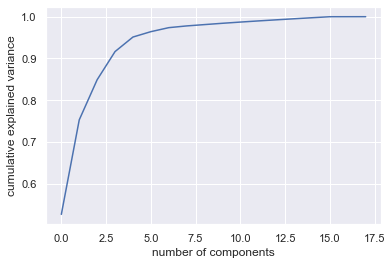

In [39]:
from sklearn.decomposition import PCA

pca = PCA().fit(asteroid_set1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.cumsum(pca.explained_variance_ratio_)


As you can see from the graph, 75% of the variation is explained by only 2 components (dimensions). With only 5 dimensions (total of 18) you can still get over 95% of the "true" information (or "variance" as it is appropriately called in the PCA context). PCA does a good job of extracting information from the raw data, squeezing the amount of information into a much smaller form.

So even in the case of only 3 dimensions, there is still enough information to nicely separate the image data into clusters. We can see this by plotting a 3D graph. In this chart, the data points in different clusters are labelled with different colours, depending on the cluster number of the data member.

In [40]:
x = projected[:,0]
y = projected[:,1]
z = projected[:,2]

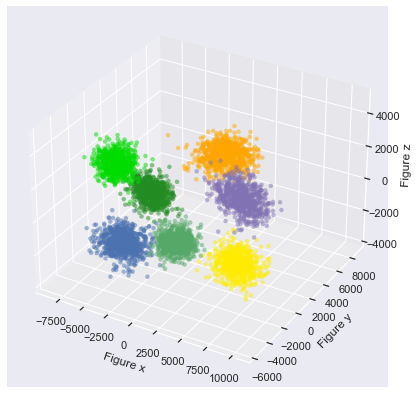

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# set the color for each cluster
col = []
colors=['#00DB00', '#FFEB00', '#FFA500', '#228B22', 'g','b','m']
for i in range(0, len(y_km)):
    col.append(colors[y_km[i]])
    
ax.set_xlabel('Figure x')
ax.set_ylabel('Figure y')
ax.set_zlabel('Figure z')
ax.scatter(x, y, z, c=col, edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('Spectral',10))

From the above 3D diagram, we can see that the asteroids in the data set are well divided into 7 clusters.

To summarise, I used the kmeans algorithm and the GMM algorithm in this task and found that both worked well to cluster the asteroid data into seven clusters. Of course, this all depends on good data cleaning and determining the number of clusters. Finally, using PCA to reduce the dimensionality of the data allows the most information to be extracted, with the aim of showing the results in an image form.

# Task 2 Predict mechanically stable of asteroid

Import required libraries and load the data.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

asteroid_set2 = pd.read_csv("China Aug 2022 Asteroid 2 v4.csv")

## 2.1 Data cleaning

### 2.1.1 Review the data-set

In [43]:
asteroid_set2

,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Category
0,218,490,25,184.0,316,823,115,325,3711,1
1,731,720,436,183.0,66,778,31,557,4613,0
2,950,964,300,912.0,601,188,114,556,1336,0
3,833,568,255,893.0,638,859,681,749,1836,0
4,938,904,328,992.0,795,602,965,928,3381,0
...,...,...,...,...,...,...,...,...,...,...
1108,175,161,357,433.0,138,632,253,818,656,0
1109,5,313,712,118.0,213,619,398,981,3191,0
1110,500,959,810,173.0,276,137,919,128,4115,0
1111,78,284,755,844.0,785,994,395,682,2921,0


In [44]:
asteroid_set2.dtypes

Chalcophyllite      object
Gypsum              object
Orpiment            object
Junitoite          float64
Phoenicochroite     object
Groutite            object
Zykaite             object
Weloganite          object
Diadochite          object
Category            object
dtype: object

### 2.1.2 Handling exception data in data set -- string

Forced conversion of feature data to numeric types, in case of unconvertible data (string with letters) the data will be converted to NaN.

In [45]:
data_columns2 = list(asteroid_set2.columns)

for i in range(10):
    asteroid_set2[data_columns2[i]] = pd.to_numeric(asteroid_set2[data_columns2[i]], errors='coerce')

In [46]:
asteroid_set2.dtypes

Chalcophyllite     float64
Gypsum             float64
Orpiment           float64
Junitoite          float64
Phoenicochroite    float64
Groutite           float64
Zykaite            float64
Weloganite         float64
Diadochite         float64
Category           float64
dtype: object

In [47]:
asteroid_set2[0:5]

,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Category
0,218.0,490.0,25.0,184.0,316.0,823.0,115.0,325.0,3711.0,1.0
1,731.0,720.0,436.0,183.0,66.0,778.0,31.0,557.0,4613.0,0.0
2,950.0,964.0,300.0,912.0,601.0,188.0,114.0,556.0,1336.0,0.0
3,833.0,568.0,255.0,893.0,638.0,859.0,681.0,749.0,1836.0,0.0
4,938.0,904.0,328.0,992.0,795.0,602.0,965.0,928.0,3381.0,0.0


### 2.1.3 Handling exception data in data set -- Outlier data

First, temporarily separate out the "category" column.

In [48]:
Category = asteroid_set2['Category']
asteroid_set2.drop('Category', axis=1, inplace=True)

View box plot of feature data.

<AxesSubplot:>

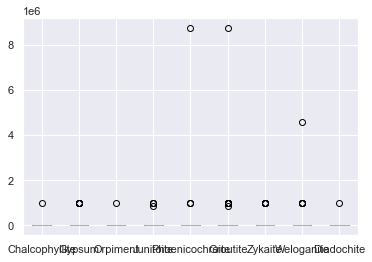

In [49]:
asteroid_set2.boxplot()

Again define a function 'detect_outliers' to detect the outliers from the box plot, returning the outliers in the dataset and their corresponding indexes.

As the data in this dataset is concentrated and there is a lot of small data, I have tuned the parameters in this function many times to finally make it work best to remove the outliers and improve the performance of the subsequent model.

In [50]:
def detect_outliers(Datalist):
    q1 = Datalist.quantile(0.25)
    q3 = Datalist.quantile(0.75)
    iqr = q3-q1
    fence_low  = q1 - 0.53*iqr  # Original value is 1.5
    fence_high = q3 + 0.53*iqr  # Original value is 1.5
    
    # Get the outlier and its index
    outliers = Datalist.loc[(Datalist < fence_low) | (Datalist > fence_high)]
    return outliers

In [51]:
detect_outliers(asteroid_set2['Weloganite'])

321     1000824.827
528     1000887.746
662     1000650.370
929     1000762.594
971     1000620.151
1028    4563545.000
Name: Weloganite, dtype: float64

Iterate through the dataset, replacing all outliers found with NaN:

In [52]:
data_columns2 = list(asteroid_set2.columns)

for i in range(9):
    result2 = detect_outliers(asteroid_set2[data_columns2[i]])
    result2 = dict(result2)
    for key in result2:
        asteroid_set2.loc[key, data_columns2[i]] = float('NaN')
        

<AxesSubplot:>

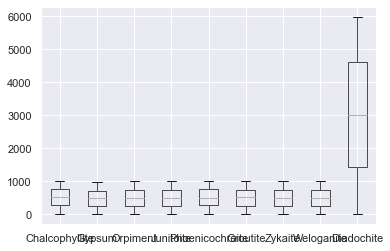

In [53]:
asteroid_set2.boxplot()

Process the last column of label data, changing all non-zero and 1 data to NaN:

In [54]:
for i in range(len(Category)):
    if ((Category[i]!=0) and (Category[i]!=1)):
        Category[i] = float('NaN')

In [55]:
asteroid_set2 = pd.concat([asteroid_set2, Category], axis=1)

After the above steps, only the NaN value remains for the exception data

### 2.1.4 Visualise missing data

<AxesSubplot:>

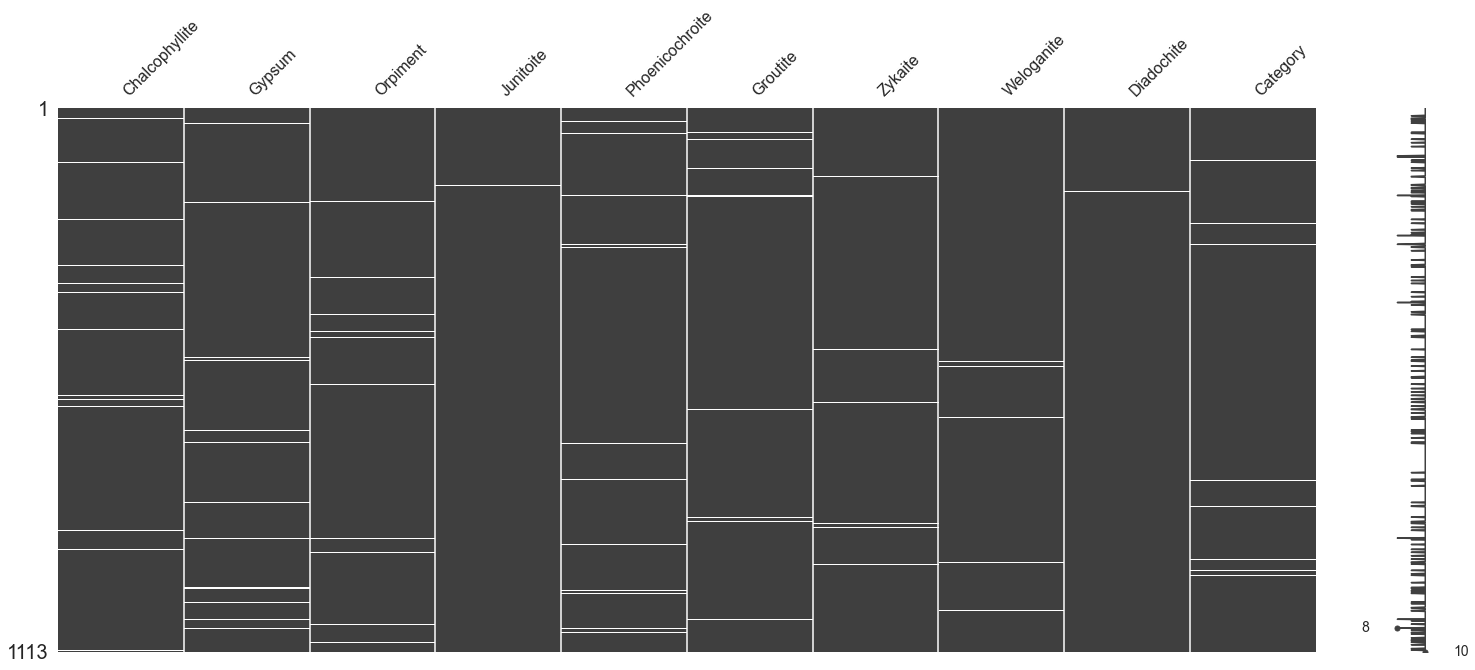

In [56]:
import missingno as msno
msno.matrix(asteroid_set2)

### 2.1.5 Handling exception data in data set --NaN value

Remove any data records with a missing "Category":

In [57]:
asteroid_set2.dropna(axis='index', subset='Category', inplace=True)

Review data:

In [58]:
asteroid_set2.shape

(1101, 10)

In [59]:
asteroid_set2.isnull().sum().sum()

140

In [60]:
asteroid_set2.isnull().sum()

Chalcophyllite     24
Gypsum             22
Orpiment           20
Junitoite           4
Phoenicochroite    21
Groutite           20
Zykaite            11
Weloganite         11
Diadochite          7
Category            0
dtype: int64

Removing features that have insufficient data:

In [61]:
# drop all rows with less than 9 data available (Category数据也包含在内)
limitPer = 9
asteroid_set2.dropna(axis='rows', thresh=limitPer, inplace=True)
asteroid_set2.shape

(1094, 10)

We therefore learn that only 7 set of asteroid data is missing two or more features at the same time. With this in mind, I chose to fix all the remaining missing data by subsituting in the average of the feature (column).

In [62]:
data_columns2 = list(asteroid_set2.columns)

for i in range(9):
    asteroid_set2[data_columns2[i]].fillna(asteroid_set2[data_columns2[i]].mean(),inplace=True)

In [63]:
asteroid_set2.isnull().sum().sum()

0

In [64]:
asteroid_set2[0:5]

,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Category
0,218.0,490.0,25.0,184.0,316.0,823.0,115.0,325.0,3711.0,1.0
1,731.0,720.0,436.0,183.0,66.0,778.0,31.0,557.0,4613.0,0.0
2,950.0,964.0,300.0,912.0,601.0,188.0,114.0,556.0,1336.0,0.0
3,833.0,568.0,255.0,893.0,638.0,859.0,681.0,749.0,1836.0,0.0
4,938.0,904.0,328.0,992.0,795.0,602.0,965.0,928.0,3381.0,0.0


In this dataset, the label is the "Category" feature. If the asteroid is mechanically stable, it contains a "0", otherwise it contains a "1".

<AxesSubplot:xlabel='Category', ylabel='count'>

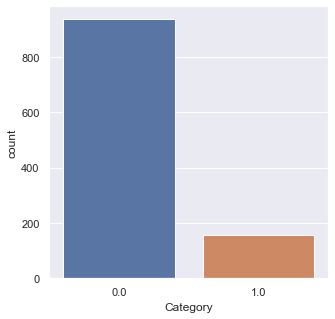

In [65]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x = "Category", data=asteroid_set2)

In [66]:
asteroid_set2.describe().round(3)

,Chalcophyllite,Gypsum,Orpiment,Junitoite,Phoenicochroite,Groutite,Zykaite,Weloganite,Diadochite,Category
count,1094.000,1094.000,1094.000,1094.000,1094.000,1094.000,1094.000,1094.000,1094.000,1094.000
mean,525.120,486.182,507.975,501.297,503.852,504.319,502.553,502.637,3001.397,0.144
std,276.655,278.649,279.752,292.029,284.042,279.100,286.486,286.397,1766.534,0.352
min,18.000,0.000,10.000,0.000,8.000,2.000,1.000,0.000,7.000,0.000
25%,301.250,252.000,271.000,257.000,276.000,265.250,255.500,253.500,1436.750,0.000
50%,525.120,486.591,507.975,490.500,503.852,504.319,507.500,502.637,3001.397,0.000
75%,764.750,715.750,741.750,753.500,751.500,735.000,743.750,746.750,4595.000,0.000
max,1000.000,988.000,1000.000,1000.000,999.000,999.000,999.000,998.000,5985.000,1.000


From the above graph we observe that the minimum values of these features are all around 0 and are not considered as outlier data in the box plot...

For now we can consider these data as normal.

Next comes the crucial modelling part.In this case, I will use Logistic Regression, Random Forest Classifier and Perceptron to fit the data.

## 2.2 Logistic Regression

### 2.2.1 Build the model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [68]:
# split the data into two parts
X = asteroid_set2.loc[:,'Chalcophyllite':'Diadochite']
Y = asteroid_set2['Category']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [69]:
logModel = LogisticRegression(solver='liblinear')
logModel = logModel.fit(X_train,Y_train)
predictions = logModel.predict(X_test)
predictions[0:15]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

### 2.2.2 Check the Model Quality

In [70]:
print(logModel.score(X_test,Y_test))

0.9634703196347032


Use 'confusion matrix' to measure model quality:

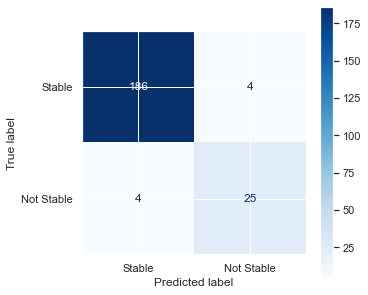

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predictions,
                      display_labels=['Stable','Not Stable'], 
                      cmap=plt.cm.Blues,) 
plt.show()

In [72]:
# run the model for that person 
print(logModel.predict_proba(X_test[0:1]))

[[0.83214849 0.16785151]]


## 2.3 Polynomial Regression
### 2.3.1 Review the data visually

(10.5, -0.5)

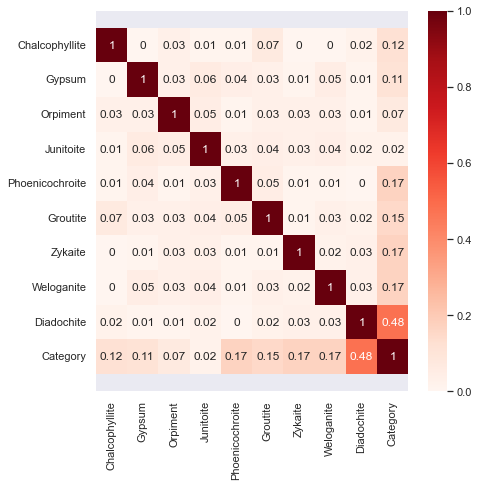

In [73]:
correlation_matrix = np.absolute(asteroid_set2.corr().round(2))
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

So strange, it looks like there is almost no correlation between features. Category is only strongly connected to 'Diadochite'... Therefore, I don't think this dataset is suitable for modelling with Polynomial Regression.

## 2.4 Random Forest Classifier
### 2.4.1 Build the model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [76]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, Y_train) 
predictions = rfc.predict(X_test)

### 2.4.2 Check the Model Quality

In [77]:
rfc.score(X_test, Y_test)

0.9315068493150684

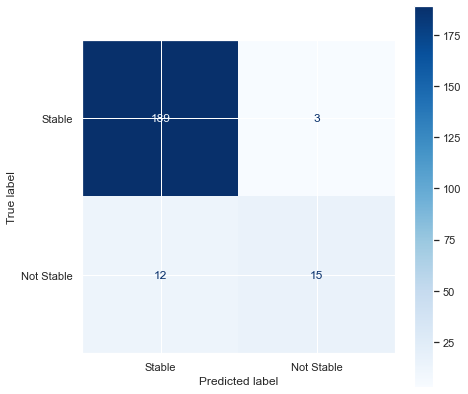

In [78]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions,
                      display_labels=['Stable','Not Stable'], 
                      cmap=plt.cm.Blues)
sns.set(rc={'figure.figsize':(4,5)})
plt.show()

### 2.4.3 Hyper-parameter Tuning

Automated search of optimum hyper-parameter.

First, create a list that identifies the hyperparameters and the range of values that should be attempted for each parameter:

In [79]:
param_grid = [
    {'ccp_alpha':[0.0, 0.005, 0.007, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1],
     'criterion':['gini', 'entropy'],
     'max_depth':[2,3,4,5,6,7,8,9],
     'max_leaf_nodes':[2,3,4,5,6,7,8,9]}
]

Then use the "GridSearchCV" function to attempt each permutation of the hyperparameters until the best setting is found:

In [80]:
clf = GridSearchCV(estimator = rfc, param_grid = param_grid)
best_model= clf.fit(X_train, Y_train)

Review models with optimal settings:

In [81]:
print(best_model.score(X_test, Y_test))

0.908675799086758


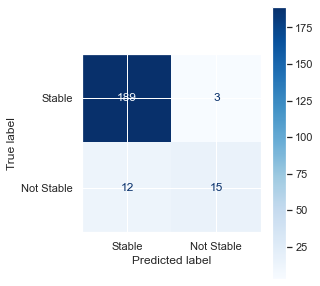

In [82]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions,
                      display_labels=['Stable','Not Stable'], 
                      cmap=plt.cm.Blues,)
sns.set(rc={'figure.figsize':(5,6)})
plt.show()

## 2.5 Sklearn Perceptron

###  2.5.1 Build the model

In [87]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

Create a sklearn "perceptron" model and fit it to the data:

In [88]:
from sklearn.linear_model import Perceptron
p = Perceptron(max_iter=500) 
p.fit(X_train, Y_train);

In [89]:
print('theta 1 = ', p.coef_[0][0])
print('theta_2 = ', p.coef_[0][1])
print( 'theta_0 = ', p.intercept_[0])

theta 1 =  -26573.75350140059
theta_2 =  -22001.817674418606
theta_0 =  46.0


### 2.5.2 Check the Model Quality

In [90]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(X_train)
predictions_test = p.predict(X_test)
train_score = accuracy_score(predictions_train, Y_train) 
print("score on train data: ", train_score.round(5))
test_score = accuracy_score(predictions_test, Y_test) 
print("score on test data: ", test_score.round(5))


score on train data:  0.944
score on test data:  0.94977


In summary, I have used three methods for modelling: Logistic Regressionm, Random Forest Classifier and Sklearn Perceptron.

I have found that adjusting the data cleaning parameters up front has a different impact on the different models. In this case when I slightly expanded the range of outlier data and cleaned up more of it, the first two models usually performed better, while the last model performed worse (to a slight degree). What I mean is that in many cases, the first two models change in the opposite way to the last one.(This conclusion is only based on my little observation in this case)

As can be seen from the assessment results, All three models have a good performance. The most suitable method for modelling this case is probably Logistic Regression, which can be used to predict the mechanical stability of an asteroid based on its mineral mixture.